# Materialien zu <i>zufall</i>

Autor: Holger Böttcher - hbomat@posteo.de

## Aufgaben 8 - Wahrscheinlichkeiten der Binomial-<br>verteilung
<br><br>

In [1]:
%run zufall/start

### Beispiele zur Berechnung
<i>Bei der Verwendung von zufall können die Wahrscheinlichkeiten der Binomial-<br>
verteilung immer exakt (als rationale Zahlen) berechnet werden</i> 
<br><br>
Gegeben sei die Verteilung
</div>

In [2]:
bv = BV(50, 0.3)

Für eine leichtere Schreibweise wird die der $P$-Methode von $bv$ temporär umbenannt

In [3]:
P = bv.P

Berechnung von Wahrscheinlichkeiten 

In [8]:
P(22), P(22, d=4)   # W. für ein Elementarereignis

⎛ 6405457976272296933117425178499025258105735307         ⎞
⎜────────────────────────────────────────────────, 0.0128⎟
⎝500000000000000000000000000000000000000000000000        ⎠

In [9]:
P([22, 23, 25])   # W. für ein (zusammengesetztes) Ereignis

 130820253983903689893135559302140252321046769797
─────────────────────────────────────────────────
6250000000000000000000000000000000000000000000000

In [10]:
P(22) + P(23) + P(25)   # Summe der Einzel-W. zum Vergleich

 130820253983903689893135559302140252321046769797
─────────────────────────────────────────────────
6250000000000000000000000000000000000000000000000

<br>
Gesucht werde $\quad  p = P(10 \le X \le 20)$
<br><br>
Es werden Möglichkeiten zur Berechnung der exakten Werte wie auch von Näherungs-<br>
werten über die Normalverteilung aufgezeigt
<br>

### 1. Berechnung exakter Werte

In [13]:
P( '10 <= X <= 20' )    # der exakte Wert

9120045304402759334967569950009126169627526030399 
──────────────────────────────────────────────────
10000000000000000000000000000000000000000000000000

In [14]:
P( '10 <= X <= 20', d=6 )   # der exakte Wert im Rahmen der gewählten Genauigkeit

0.912005

### 2. Berechnung mittels der Verteilungsfunktion</b>

Diese Berechnungsart wird bei der manuellen Berechnung unter Verwendung einer<br>
Tabelle der Binomialverteilung angewendet

In [27]:
F = bv.F   # Umbenennung, analog zu P

In [28]:
F(20, d=4), F(9, d=4)     # einzelne Werte

(0.9522, 0.0402)

In [29]:
N(F(20) - F(9))   # ebenfalls ein exakter Wert im Rahmen der gewählten Genauigkeit

0.912004530440276

In [30]:
F(20, d=4) - F(9, d=4)    # ein ungenauerer Wert, da die Rundung bereits für 
                                # die Einzelwerte vorgenommen wurde

0.912

### 3. Berechnung von Näherungswerten mittels der $ \:(0,1)\,-\,$Normalverteilung</b>

Diese Berechnungsart wird bei der manuellen Berechnung unter Verwendung einer<br>
Tabelle der Normalverteilung angewendet. Die Berechnung "per Hand" läuft so ab
<br><br>
<b>a)</b>  Bestimmung von Erwartungswert, Varianz, Standardabweichung der gegebenen <br>
$\quad$Binomialverteilung

In [20]:
bv.erw,   bv.var,   bv.sigma

⎛          √42⎞
⎜15, 21/2, ───⎟
⎝           2 ⎠

In [23]:
bv.erw,   bv.var_(d=4),   bv.sigma_(d=4)

(15, 10.5, 3.2404)

<b>b)</b>  Untersuchung der Anwendbarkeit der Approximation durch die Normalverteilung 

In [24]:
bv.faust_regel

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<b>c)</b> Standardisierung und Ermittlung der Grenzen des Intervalls für die <br>
&nbsp;&nbsp;&nbsp;$\,(0, \:1)\,-\,$Normalverteilung; hier wurde die Stetigkeitskorrektur beachtet

In [31]:
z = lambda x: N((x-bv.erw) / bv.sigma)

In [32]:
z(9.5), z(20.5)

(-1.69733684958301, 1.69733684958301)

<b>d)</b>  Entnahme von Werten aus der Tabelle (hier reicht zufällig ein Wert aus)
<br><br>
Aus der Tabelle wird für $x = 1.7$ der Wert  $0.4554$ entnommen, dieser ist zu verdop-<br>
peln, die gesuchte Wahrscheinlichkeit ist $p = 0.9108$

Der "genau" berechnete, über die Normalverteilung ermittelbare Wert ist

In [16]:
NV(0,1).P( '-1.69733684958301 < X < 1.69733684958301' )

0.9103670057321107

### 4. Berechnung von Näherungswerten mittels der Eigenschaft $nv$_$approx$

Die Approximation der gegebenen Binomialverteilung durch eine Normalvertei-<br>
lung ist

In [4]:
nv = bv.nv_approx; nv

NormalVerteilung\left(15,\;\frac{\sqrt{42}}{2}\right)

also eine NormalVerteilung, deren Parameter sich aus Erwartungswert
und Varianz <br>der Binomialverteilung ergeben

Die Berechnung der gesuchten Wahrscheinlichkeit ergibt (fast( den gleichen Wert <br>
wie bei Verwendung der $(0,1)$-Normalverteilung

(Auch hier muss die Faustregel zur Entscheidung über die Verwendbarkeit der <br>
Näherung herangezogen werden)

In [5]:
nv.P( '9.5 < X < 20.5' )    

0.9103670057321109

Der visuelle Vergleich der Binomialverteilung mit mit ihrer $NV$-Näherung <br>
ist mittels der $hist$-Eigenschaft möglich

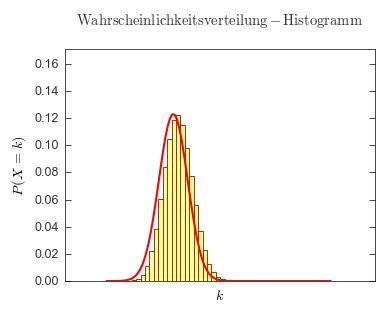

In [9]:
bv.hist_(bv.nv_approx)

Durch Verschieben entlang der $x$-Achse kann die Grafik besser eingepaßt <br>werden
(der Verschiebe-Paramter -1 wurde hier durch Probieren ermittelt)

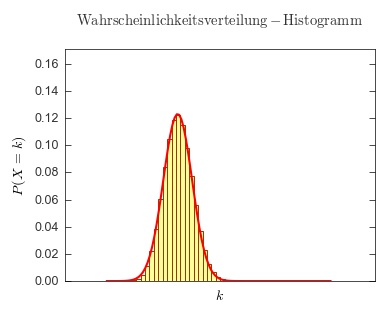

In [7]:
bv.hist_(NV(bv.nv_approx.erw + 1, bv.nv_approx.sigma))